In [2]:
import numpy as np
import pandas as pd
import pybrain

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pylab as pylab
import PIL
pylab.rcParams['figure.figsize']= 16,5

In [4]:
from pybrain import FeedForwardNetwork
from pybrain import LinearLayer,SigmoidLayer
from pybrain import FullConnection
from pybrain.supervised.trainers import BackpropTrainer
from pybrain import datasets

implementar SKLEARN para el procesamiento paralelo

importing FeedForward Network class from pybrain

In [2]:
from pybrain import FeedForwardNetwork
n = FeedForwardNetwork()

importing LinearLayer and SigmoidLayer as layer class of neurons for each layer

In [3]:
from pybrain import LinearLayer,SigmoidLayer
inLayer = LinearLayer(2)
hiddenLayer = SigmoidLayer(2)
outLayer = LinearLayer(1)

Adding layers to FFN

In [4]:
n.addInputModule(inLayer)
n.addModule(hiddenLayer)
n.addOutputModule(outLayer)

Import FullConnecition Class to create matrix for connections between layers

In [5]:
from pybrain import FullConnection
in_to_hidden = FullConnection(inLayer,hiddenLayer)
hidden_to_out = FullConnection(hiddenLayer,outLayer)

Add connections to FNN

In [6]:
n.addConnection(in_to_hidden)
n.addConnection(hidden_to_out)

Sort Modules in FNN for initialice the FNN as topologically sorted of the modules (layers)

In [7]:
n.sortModules()

Printing the FNN estructures 

In [8]:
print n

FeedForwardNetwork-6
   Modules:
    [<LinearLayer 'LinearLayer-3'>, <SigmoidLayer 'SigmoidLayer-7'>, <LinearLayer 'LinearLayer-8'>]
   Connections:
    [<FullConnection 'FullConnection-4': 'SigmoidLayer-7' -> 'LinearLayer-8'>, <FullConnection 'FullConnection-5': 'LinearLayer-3' -> 'SigmoidLayer-7'>]



activating the FFN

In [9]:
n.activate([1,2])

array([-1.38922383])

Checking connections weigths

In [10]:
in_to_hidden.params

array([ 0.78400177,  0.72852973, -0.27533457,  1.11515738])

In [11]:
hidden_to_out.params

array([-0.56228732, -1.00570414])

In [12]:
n.params

array([ 0.78400177,  0.72852973, -0.27533457,  1.11515738, -0.56228732,
       -1.00570414])

Creating DataSet

In [3]:
from pybrain.datasets import SupervisedDataSet

In [4]:
DS = SupervisedDataSet(3,2)
DS.appendLinked([1,2,3], [4,5] )
len(DS)

1

In [7]:
DS['input']

array([[ 1.,  2.,  3.]])

In [140]:
def create_DS(values, lags):
    dataSet = np.zeros((len(values)-(lags), lags))
    for x in xrange(len(values)-(lags)):
        dataSet[x] = values[x: x+lags]
    return dataSet

In [64]:
val = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
lag = 12
dat = create_DS(val,lag)
dat

array([[  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.],
       [  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
         13.],
       [  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,
         14.],
       [  4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,
         15.],
       [  5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,
         16.],
       [  6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,
         17.],
       [  7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,
         18.],
       [  8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,
         19.],
       [  9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,
         20.],
       [ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,
         21.],
       [ 11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.],
       [ 12.,  13.,  

In [5]:
rawData = pd.read_csv('resources/Consulta_Banxico.csv', sep=',', encoding='latin1', skiprows=16, skip_blank_lines=True)
column = rawData.columns.values

In [6]:
rawData
Data = rawData.drop(rawData.index[:2])
Data = Data.reset_index(drop = True)
Data.columns = ['Fecha' , 'Tasa de crecimiento Mensual']

Se eliminan los 2 primeros indices debido a que no son utiles ( es texto y la primera observación no tiene valor) y se crea la estructura de Serie (para la serie de tiempo)

In [7]:
TS = pd.Series(Data['Tasa de crecimiento Mensual'].astype(float))

In [8]:
TS.index= Data['Fecha']

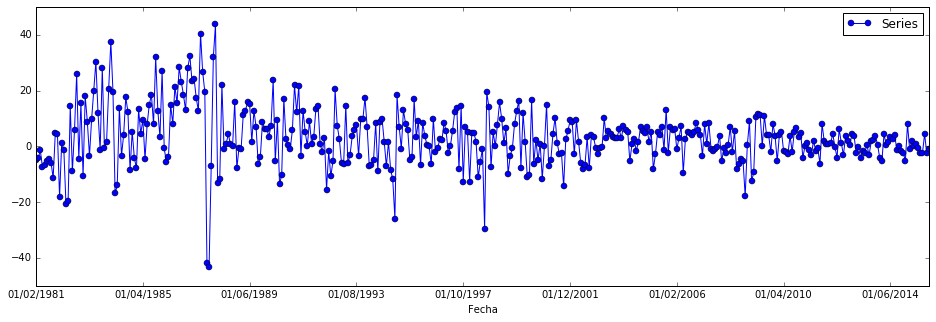

In [9]:
plt.figure()
TS.plot(style='o-', label = 'Series')
plt.legend()

In [12]:
from pybrain import datasets

In [10]:
def create_DataMatrix_Output(values,TS, lags):
    dataSet = np.zeros((len(values)-(lags), lags))
    for x in xrange(len(values)-(lags)):
        dataSet[x] = values[x: x+lags]
    output = TS[lags:]    
    return dataSet,output

In [11]:
dataMatrix, output = create_DataMatrix_Output(Data['Tasa de crecimiento Mensual'],TS,12)
Train = dataMatrix[:383]
TrainOutput = output[:383]
Val = dataMatrix[383:395]
ValOutput = output[383:395]
Test = dataMatrix[395:]
TestOutput = output[395:]

In [12]:
def create_DS(dataMatrix,output,lags):
    DS = datasets.SupervisedDataSet(12, 1)
    for x in xrange(len(dataMatrix)):
        DS.appendLinked(dataMatrix[x], output[x])
    return DS

In [13]:
TrainDS = create_DS(Train,TrainOutput,12)
ValDS = create_DS(Val,ValOutput,12)
TestDS= create_DS(Test,TestOutput,12)

In [14]:
ffn = FeedForwardNetwork()
inLayer = LinearLayer(12)
hiddenLayer = SigmoidLayer(3)
outLayer = LinearLayer(1)

In [15]:
ffn.addInputModule(inLayer)
ffn.addModule(hiddenLayer)
ffn.addOutputModule(outLayer)

In [16]:
in_to_hidden = FullConnection(inLayer,hiddenLayer)
hidden_to_out = FullConnection(hiddenLayer,outLayer)
ffn.addConnection(in_to_hidden)
ffn.addConnection(hidden_to_out)

In [17]:
ffn.sortModules()

In [18]:
trainer = BackpropTrainer(ffn, TrainDS)

In [19]:
trainer.trainUntilConvergence(verbose= True, maxEpochs=1000, validationProportion= 0.1,continueEpochs= 10)

('train-errors:', '[59.5573  , 56.0087  , 55.5384  , 55.5351  , 55.4109  , 56.1523  , 54.5453  , 55.8308  , 55.3742  , 55.7958  , 55.3333  , 55.3279  , 55.4888  , 55.3994  , 55.0871  , 54.9752  , 54.7352  , 55.0133  , 54.978   , 54.9649  , 54.7589  , 54.4454  , 54.1964  , 54.0102  , 54.3974  , 55.0374  , 55.8693  , 55.3793  , 55.1468  , 54.6974  , 54.2266  , 54.2567  , 54.4303  , 54.2522  , 54.3931  , 53.8947  , 54.1283  , 54.4098  , 54.6421  , 54.3571  , 54.258   , 54.6245  , 54.7303  , 54.3817  , 53.5242  , 54.1995  , 53.8804  , 54.0777  , 54.6611  , 54.5728  , 54.6126  , 54.2427  , 54.5255  , 53.8295  , 53.6257  , 53.0253  , 53.6571  , 53.1461  , 53.2166  , 54.067   , 53.4275  , 52.7313  , 52.8529  , 52.4982  , 53.2133  , 52.0478  , 52.7921  , 52.6397  , 52.5569  , 52.5597  , 52.7653  , 52.8665  , 52.0892  , 51.8852  , 52.6478  , 52.5855  , 52.5483  , 52.2343  , 52.5869  , 52.7917  , 52.5635  , 52.4185  , 52.518   , 52.5071  , 52.5276  , 51.8843  , 51.5915  , 52.5612  , 52.4976  , 5

([59.557317775639284,
  56.008720367849953,
  55.5383874097149,
  55.535050617767546,
  55.410942806723895,
  56.152337557870112],
 [58.081812952906844,
  48.902947021227007,
  47.4181711802322,
  47.835961193861223,
  46.92144242819495,
  47.677994541981917,
  45.962372180719107])

In [20]:
predictions = ffn.activateOnDataset(TestDS)
predictions = predictions.reshape(1,12)

In [21]:
TStestPredictions = pd.Series(predictions[0].astype(float), index = TS.index[len(TS)-12:])
TStestOutputs = pd.Series(TestOutput, index = TS.index[len(TS)-12:])

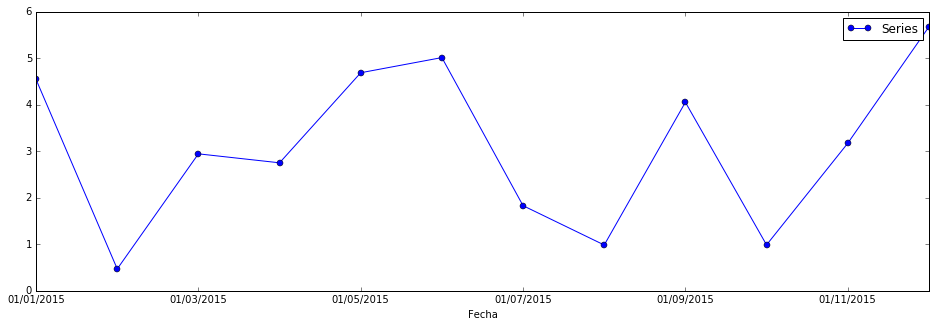

In [22]:
plt.figure()
TStestPredictions.plot(style='o-', label = 'Series')
plt.legend()

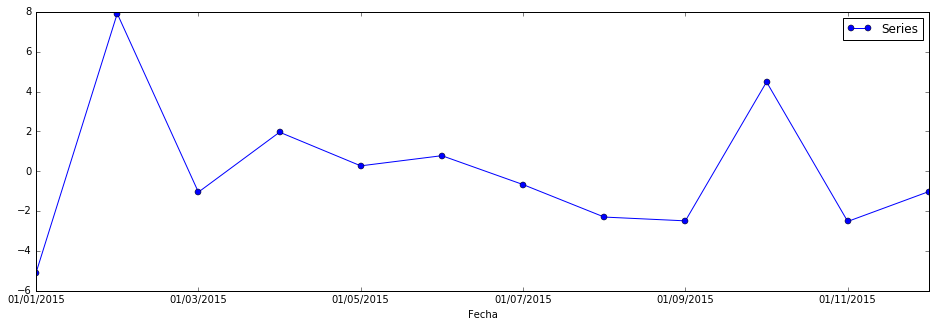

In [23]:
plt.figure()
TestOutput.plot(style='o-', label = 'Series')
plt.legend()

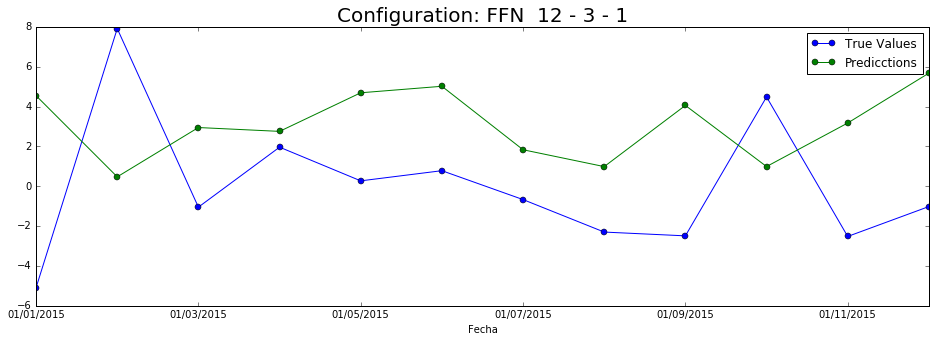

In [24]:
plt.figure()
TStestOutputs.plot(style= 'o-', label = "True Values")
TStestPredictions.plot(style = 'o-', label = "Predicctions")
plt.legend()
plt.title('Configuration: FFN  12 - 3 - 1', fontsize = 20)

In [25]:
TSpredictions = TS.copy()
TSpredictions[len(TS)-12:] = TStestPredictions.copy()

In [26]:
print TS[len(TS)-12:],TStestPredictions

Fecha
01/01/2015   -5.09
01/02/2015    7.91
01/03/2015   -1.05
01/04/2015    1.96
01/05/2015    0.27
01/06/2015    0.78
01/07/2015   -0.67
01/08/2015   -2.30
01/09/2015   -2.49
01/10/2015    4.48
01/11/2015   -2.52
01/12/2015   -1.02
Name: Tasa de crecimiento Mensual, dtype: float64 Fecha
01/01/2015    4.544188
01/02/2015    0.470612
01/03/2015    2.945464
01/04/2015    2.752433
01/05/2015    4.689473
01/06/2015    5.015343
01/07/2015    1.830620
01/08/2015    0.984701
01/09/2015    4.054897
01/10/2015    0.987297
01/11/2015    3.172189
01/12/2015    5.675532
dtype: float64


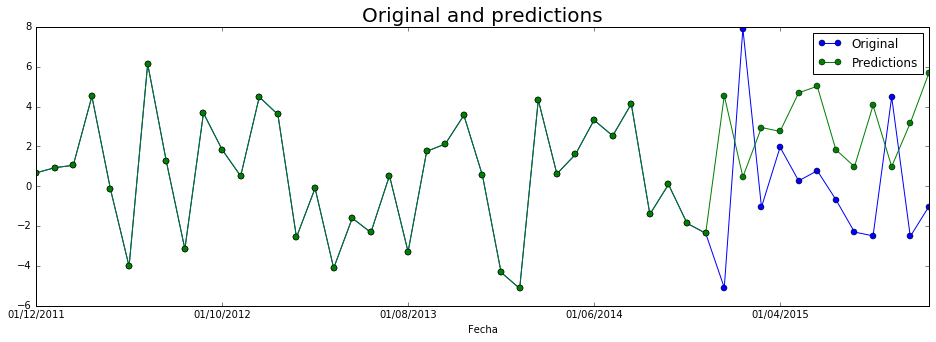

In [32]:
plt.figure()
TS[370:].plot(style = 'o-', label = 'Original')
TSpredictions[370:].plot(style = 'o-', label = 'Predictions')
plt.legend();
plt.title('Original and predictions', fontsize = 20)

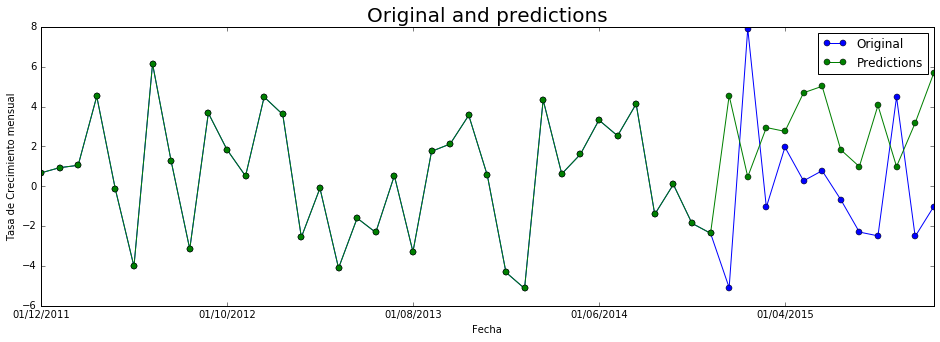

In [52]:
fig  = plt.figure()
TS[370:].plot(style = 'o-', label = 'Original')
TSpredictions[370:].plot(style = 'o-', label = 'Predictions')
plt.legend();
plt.ylabel('Tasa de Crecimiento mensual')
plt.title('Original and predictions', fontsize = 20)

In [53]:
fig.savefig('first.png')

In [54]:
from PIL import Image
from PIL import PngImagePlugin
METADATA = {"Author" : "Santos Alberto Bañuelos Solis", "Work" : "Prediccion de Indices Bursatiles uando redes neuronales"}
img = Image.open('First.png')
meta = PngImagePlugin.PngInfo()
for x in METADATA:
    meta.add_text(x,METADATA[x])    
img.save('first.jpg', 'JPEG',pnginfo = meta)

In [10]:
lags = 12

Creation of function to build neural networks with different parameters (InLayer, Hidden layer, and maybe activation function)

In [11]:
def buildFFN(inNeurons,hiddenNeurons):
    ffn = FeedForwardNetwork()
    inLayer = LinearLayer(inNeurons)
    hiddenLayer = SigmoidLayer(hiddenNeurons)
    outLayer = LinearLayer(1)
    ffn.addInputModule(inLayer)
    ffn.addModule(hiddenLayer)
    ffn.addOutputModule(outLayer)
    in_to_hidden = FullConnection(inLayer,hiddenLayer)
    hidden_to_out = FullConnection(hiddenLayer,outLayer)
    ffn.addConnection(in_to_hidden)
    ffn.addConnection(hidden_to_out)
    ffn.sortModules()
    return ffn

Creation of dataMatrix and dataSets

In [12]:
def create_DataMatrix_Output(values,TS, lags):
    dataSet = np.zeros((len(values)-(lags), lags))
    for x in xrange(len(values)-(lags)):
        dataSet[x] = values[x: x+lags]
    output = TS[lags:]    
    return dataSet,output

In [13]:
def create_DS(dataMatrix,output,lags):
    DS = datasets.SupervisedDataSet(12, 1)
    for x in xrange(len(dataMatrix)):
        DS.appendLinked(dataMatrix[x], output[x])
    return DS

los dataSet de validacion y Test tendran ambos 12 observaciones para ser evaludados

In [14]:
dataM, output = create_DataMatrix_Output(Data['Tasa de crecimiento Mensual'],TS,lags)
TrainM = dataM[:(len(dataM)-2*12)]
TrainO = output[:(len(dataM)-2*12)]
ValM = dataM[(len(dataM)-2*12):(len(dataM)-12)]
ValO = output[(len(dataM)-2*12):(len(dataM)-12)]
##TestM = dataM[(len(dataM)-lags):]
##TestO = output[(len(dataM)-lags):]

In [15]:
TrainDS = create_DS(TrainM,TrainO,lags)
ValDS = create_DS(ValM,ValO,lags)
##TestDS = create_DS(TestM,TestO,lags)

In [16]:
def create_DataSets(lags):
    dataM, output = create_DataMatrix_Output(Data['Tasa de crecimiento Mensual'],TS,lags)
    TrainM = dataM[:(len(dataM)-2*12)]
    TrainO = output[:(len(dataM)-2*12)]
    ValM = dataM[(len(dataM)-2*12):(len(dataM)-12)]
    ValO = output[(len(dataM)-2*12):(len(dataM)-12)]
    TrainDS = create_DS(TrainM,TrainO,lags)
    ValDS = create_DS(ValM,ValO,lags)
    return TrainDS,ValDS,ValO

In [17]:
len(TrainDS)

383

Creation of function to train neural network with different parameters (learning rate and maybe learning algorithm and batch learning, see documentation)

In [18]:
def trainFNN(ffn,TrainDS,LearnRate,MaxEpochs):
    trainer = BackpropTrainer(ffn, TrainDS,learningrate = LearnRate )
    trainer.trainUntilConvergence(verbose= False, maxEpochs=MaxEpochs,validationProportion= 0.1,continueEpochs= 10)
    return ffn

Creation of Validation Test Function to evaluate RNA with a mean of 100 runs

In [19]:
def get_ValPredictions(ffn,ValDS):
    predictions = ffn.activateOnDataset(ValDS)
    predictions = predictions.reshape(1,12)
    return predictions

In [20]:
def get_MSE(predictions, output):
    return  np.mean(np.sum((output - predictions)**2))

In [21]:
def ValidationTest(ffn, ValDS,output, lags):
    predictions = ffn.activateOnDataset(ValDS)
    predictions = predictions.reshape(1,lags)
    mse = get_MSE(predictions[0],output)
    return mse

In [22]:
def SolutionValidation(meanPredictions,mse,bestFFN,bestMSE,bestPredictions,lags,an,maxE,LearnR):
        if(mse < bestMSE):
            bestFFN = [lags,an,maxE,LearnR]
            bestMSE = mse
            bestPredictions = meanPredictions
        return bestMSE,bestFFN, bestPredictions

Number of inLayer neurons it's the same as number of lags, so I use number of lags as in-Neurons

In [23]:
def Validation(ParametersList):
    bestParameters = [len(ParametersList)]
    bestRNA = []
    bestMSE = 10000000000000000
    bestPredicts = []
    for lags in ParametersList[0]:    
        TrainDS,ValDS,ValOutput = create_DataSets(lags)
        for an in ParametersList[1]:
            ffn = buildFFN(lags,an)
            for maxE in ParametersList[2]:
                for learnR in ParametersList[3]:
                    trainFNN(ffn,TrainDS,learnR,maxE)
                    MSEsum = 0 
                    sumPredictions = np.zeros((1,lags))
                    for epoch in xrange(100):
                        predictions = get_ValPredictions(ffn,ValDS)
                        mse = ValidationTest(ffn, ValDS,ValOutput, lags)
                        MSEsum += mse
                        sumPredictions += predictions
                    MSEmean = MSEsum / 100
                    MeanPredictions = sumPredictions / 100
                    bestMSE,bestRNA,bestPredicts = SolutionValidation(MeanPredictions,MSEmean,bestRNA,bestMSE,bestPredicts,lags,an,maxE,learnR)
    return bestRNA, MSEmean, bestPredicts

In [24]:
ParametersList = [[12],[3],[1000],[0.1]]

Test of every function included in Validation individaully
1.- creation of DS

In [25]:
TrainDS1, ValDS1, ValOutput1 = create_DataSets(lags)

In [26]:
ffn = buildFFN(lags,3)

In [43]:
ffn = trainFNN(ffn,TrainDS1,0.1,1000)

In [44]:
predictions = get_ValPredictions(ffn,ValDS1)

In [48]:
predictions

array([[ -1.04443689e+00,   2.49148880e+00,   3.83772826e-01,
         -1.04444875e+00,   3.83772826e-01,   2.59758217e+00,
          2.56601152e+00,  -6.60675922e-01,   2.21381028e+00,
          3.25825809e+00,  -2.53192081e-09,   2.21380934e+00]])

In [46]:
sumPredictions = np.zeros((1,lags))

In [49]:
sumPredictions += predictions

In [54]:
print (sumPredictions / 100)

[[ -2.08887379e-02   4.98297760e-02   7.67545652e-03  -2.08889750e-02
    7.67545652e-03   5.19516434e-02   5.13202303e-02  -1.32135184e-02
    4.42762056e-02   6.51651618e-02  -5.06384162e-11   4.42761868e-02]]


In [62]:
mse = get_MSE(predictions[0],ValOutput1)

In [63]:
mse1 = ValidationTest(ffn, ValDS1,ValOutput1, lags)

In [64]:
print mse1, mse

233.409318123 233.409318123


In [67]:
mse2,rna1 = SolutionValidation(mse1,[],100000000,lags,3,1000,0.1)

In [69]:
mse2

233.40931812292322

First Test of Validation Function

In [56]:
rna,mse,pr = Validation(ParametersList)

In [57]:
pr

array([[  2.61651963e+00,   4.85853435e+00,   2.67467187e+00,
          5.81522346e-02,   5.81522346e-02,   2.24615587e-31,
          2.61651963e+00,   2.61651963e+00,   2.61651963e+00,
          2.24201472e+00,   4.85853435e+00,   5.81525550e-02]])

New Parameter List

In [72]:
ParametersList = [[12],[3,5],[500,1000,1500],[0.1,0.05]]

In [49]:
rna,mse = Validation(ParametersList)

In [51]:
rna

[]

loop of 100 runs for mean prediction of a single configuration

In [73]:
MSEsum = 0
sumPredictions = np.zeros((1,lags))
Predicts = np.zeros((10,lags))
for epoch in xrange(10):
    ffn = trainFNN(ffn,TrainDS1,0.1,1000)
    predictions = get_ValPredictions(ffn,ValDS1)
    Predicts[epoch]  = predictions
    mse = ValidationTest(ffn, ValDS1,ValOutput1, lags)
    MSEsum += mse
    sumPredictions += predictions
MSEmean = MSEsum / 10
MeanPredictions = sumPredictions / 10

In [48]:
MeanPredictions

array([[ -4.52184311e-44,  -5.21991599e-52,   9.18457718e-02,
          3.64754633e+00,  -7.33800495e-01,   5.51374947e-12,
          3.55570056e+00,   3.55570056e+00,   4.38134683e+00,
          3.55570056e+00,   3.64754633e+00,   4.38134683e+00]])

In [49]:
TSValPredictions = pd.Series(MeanPredictions[0].astype(float), index = TS.index[len(TS)-24:len(TS)-12])
TSValOutputs = pd.Series(ValOutput1, index = TS.index[len(TS)-24:len(TS)-12])
TSpredictions = TS.copy()
TSpredictions[len(TS)-24:len(TS)-12] = TSValPredictions.copy()

In [50]:
TSValPredictions

Fecha
01/01/2014   -4.521843e-44
01/02/2014   -5.219916e-52
01/03/2014    9.184577e-02
01/04/2014    3.647546e+00
01/05/2014   -7.338005e-01
01/06/2014    5.513749e-12
01/07/2014    3.555701e+00
01/08/2014    3.555701e+00
01/09/2014    4.381347e+00
01/10/2014    3.555701e+00
01/11/2014    3.647546e+00
01/12/2014    4.381347e+00
dtype: float64

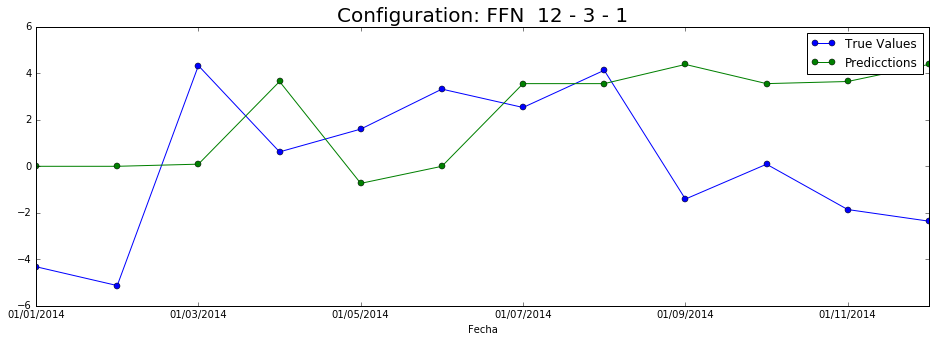

In [51]:
fig = plt.figure()
TSValOutputs.plot(style= 'o-', label = "True Values")
TSValPredictions.plot(style = 'o-', label = "Predicctions")
plt.legend()
plt.title('Configuration: FFN  12 - 3 - 1', fontsize = 20)

In [54]:
fig.savefig('Ten.png')

In [49]:
Predicts20 = Predicts

In [50]:
Predicts20

array([[ 5.24683979,  2.86532261,  0.67825878, -2.16226402,  3.09869042,
         5.26095443,  2.42043164,  2.42043164,  2.42043164,  0.25816762,
         0.67825878,  0.67825878],
       [ 2.65490428, -4.3745681 , -5.66546309, -1.2176961 ,  1.47886847,
         2.69656458,  7.14433156,  7.14433156,  7.14433156,  5.92663546,
        -5.66546308, -5.66546309],
       [ 2.12496634,  1.70921287,  3.4470409 ,  1.74215727,  3.86958754,
         2.12743027,  0.42254665,  0.42254665,  0.42254665,  2.16470392,
         3.4470409 ,  3.4470409 ],
       [ 2.56155329, -4.03667146, -3.48404574,  0.62132939,  3.22198386,
         2.60065447,  6.7060296 ,  6.7060296 ,  6.7060296 ,  7.32735899,
        -3.48404574, -3.48404574],
       [ 0.41481253, -1.67020994,  1.02789789,  2.71981772,  3.14698596,
         0.42716824,  2.11908807,  2.11908807,  2.11908807,  4.83890579,
         1.02789789,  1.02789789],
       [-0.95576832, -2.23047887,  1.75279166,  3.99654313,  3.04832859,
        -0.94821454,  

In [52]:
mean20 = MSEmean

In [55]:
print mean20

NameError: name 'mean20' is not defined

In [34]:
pred50 = predictions
mean50 = MSEmean

In [35]:
mean50

282.95245509374746

In [36]:
pred50

array([[  3.47288015e-43,   3.43505747e-51,   7.01126963e+00,
          1.06313261e+01,   5.44077375e+00,   5.53393484e-12,
          3.62005644e+00,   3.62005644e+00,   5.19055231e+00,
          3.62005644e+00,   1.06313261e+01,   5.19055231e+00]])

In [39]:
Predicts50 = Predicts
Predicts50

array([[ -1.57296519e-43,  -8.90480685e-52,  -3.56288862e-02,
          2.67234096e+00,  -2.14804638e+00,   4.05310637e-12,
          2.70796984e+00,   2.70796984e+00,   4.82038734e+00,
          2.70796984e+00,   2.67234096e+00,   4.82038734e+00],
       [  8.94695324e-45,   5.25236555e-53,   1.38448997e+00,
          2.86462204e+00,   1.23229246e-01,   2.21685761e-12,
          1.48013207e+00,   1.48013207e+00,   2.74139279e+00,
          1.48013207e+00,   2.86462204e+00,   2.74139279e+00],
       [  1.04307430e-43,   6.16245406e-52,   3.04320924e-01,
          2.32632278e+00,   1.43830792e+00,   3.02863871e-12,
          2.02200186e+00,   2.02200186e+00,   8.88014868e-01,
          2.02200186e+00,   2.32632278e+00,   8.88014868e-01],
       [  3.14548793e-45,   1.98276955e-53,   2.14592910e+00,
          4.50023660e+00,   4.41344215e-02,   3.53048932e-12,
          2.35430750e+00,   2.35430750e+00,   4.45610218e+00,
          2.35430750e+00,   4.50023660e+00,   4.45610218e+00],
    

In [46]:
Predicts25 = Predicts
pred25 = predictions
mse25 = MSEmean

In [52]:
Predicts10 = Predicts
pred10 = predictions
mse10 = MSEmean

In [56]:
mse25

312.36262924869612

In [57]:
mse10

273.40970893029959

In [58]:
Predicts10

array([[ -1.62321024e-43,  -1.87297331e-51,  -2.10373261e-01,
          2.15933624e+00,  -2.63603260e+00,   3.67111909e-12,
          2.36970950e+00,   2.36970950e+00,   4.79536885e+00,
          2.36970950e+00,   2.15933624e+00,   4.79536885e+00],
       [  3.67349263e-44,   4.24693623e-52,   3.04207528e+00,
          7.57008377e+00,   5.96628226e-01,   7.01738216e-12,
          4.52800849e+00,   4.52800849e+00,   6.97345554e+00,
          4.52800849e+00,   7.57008377e+00,   6.97345554e+00],
       [  3.85930272e-45,   4.46463062e-53,   1.00215730e+00,
          3.58924488e+00,   6.26941318e-02,   4.00977486e-12,
          2.58708758e+00,   2.58708758e+00,   3.52655075e+00,
          2.58708758e+00,   3.58924488e+00,   3.52655075e+00],
       [  3.15674861e-44,   3.65299289e-52,   1.51585973e+00,
          1.44666155e+00,   5.12907921e-01,  -1.07257963e-13,
         -6.91981804e-02,  -6.91981804e-02,   9.33753625e-01,
         -6.91981804e-02,   1.44666155e+00,   9.33753625e-01],
    

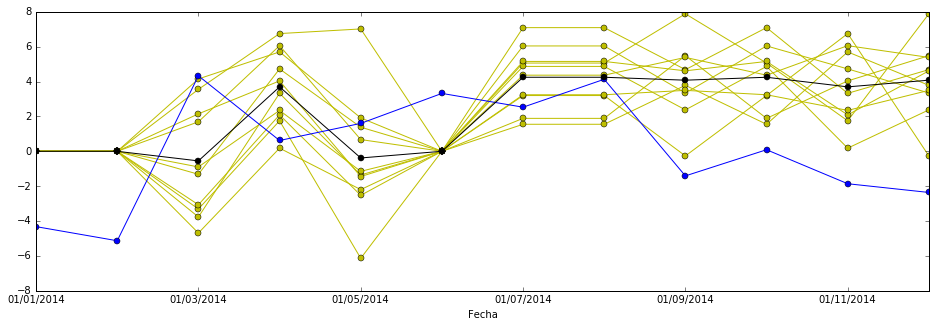

In [80]:
fig = plt.figure()
for x in xrange(10):
    TSValPredictions = pd.Series(Predicts[x].astype(float), index = TS.index[len(TS)-24:len(TS)-12])
    TSValPredictions.plot(style = 'yo-', label = ("Predicctions " + (str)(x)))
TSValOutputs.plot(style= 'o-', label = "True Values")
TSValPredictions = pd.Series(MeanPredictions[0].astype(float), index = TS.index[len(TS)-24:len(TS)-12])
TSValPredictions.plot(style = 'ko-', label = ("Predicctions " + (str)(x)))

In [81]:
fig.savefig('TenPrint.png')